<a href="https://colab.research.google.com/github/SkyTong/DS440/blob/main/LSTM_GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import time
import datetime
from dateutil import parser
import matplotlib.dates as mdates
import matplotlib.ticker as plticker

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, GRU

#np.set_printoptions(threshold=np.inf)

# Load the dataset

In [70]:
org_df = pd.read_csv('/content/BTC-USD.csv',index_col=0)

In [71]:
org_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-01,7769.040039,7769.040039,7504.950195,7624.910156,7624.910156,4797620000
2018-08-02,7634.189941,7712.770020,7523.439941,7567.149902,7567.149902,4214110000
2018-08-03,7562.140137,7562.140137,7328.649902,7434.390137,7434.390137,4627150000
2018-08-04,7438.669922,7497.490234,6984.069824,7032.850098,7032.850098,4268390000
2018-08-05,7031.080078,7102.770020,6940.700195,7068.479980,7068.479980,3679110000
...,...,...,...,...,...,...
2022-07-28,22933.640625,24110.470703,22722.265625,23843.886719,23843.886719,40212386158
2022-07-29,23845.212891,24294.787109,23481.173828,23804.632813,23804.632813,35887249746
2022-07-30,23796.818359,24572.580078,23580.507813,23656.207031,23656.207031,28148218301


In [72]:
# Assuming your DataFrame is called org_df

# Remove the first column
org_df = org_df.drop(org_df.columns[0], axis=1)

# Now org_df will have the first column removed
org_df

,High,Low,Close,Adj Close,Volume
Date,,,,,
2018-08-01,7769.040039,7504.950195,7624.910156,7624.910156,4797620000
2018-08-02,7712.770020,7523.439941,7567.149902,7567.149902,4214110000
2018-08-03,7562.140137,7328.649902,7434.390137,7434.390137,4627150000
2018-08-04,7497.490234,6984.069824,7032.850098,7032.850098,4268390000
2018-08-05,7102.770020,6940.700195,7068.479980,7068.479980,3679110000
...,...,...,...,...,...
2022-07-28,24110.470703,22722.265625,23843.886719,23843.886719,40212386158
2022-07-29,24294.787109,23481.173828,23804.632813,23804.632813,35887249746
2022-07-30,24572.580078,23580.507813,23656.207031,23656.207031,28148218301


In [73]:
org_df.columns

Index(['High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

# Features engineering

In [74]:
org_df

,High,Low,Close,Adj Close,Volume
Date,,,,,
2018-08-01,7769.040039,7504.950195,7624.910156,7624.910156,4797620000
2018-08-02,7712.770020,7523.439941,7567.149902,7567.149902,4214110000
2018-08-03,7562.140137,7328.649902,7434.390137,7434.390137,4627150000
2018-08-04,7497.490234,6984.069824,7032.850098,7032.850098,4268390000
2018-08-05,7102.770020,6940.700195,7068.479980,7068.479980,3679110000
...,...,...,...,...,...
2022-07-28,24110.470703,22722.265625,23843.886719,23843.886719,40212386158
2022-07-29,24294.787109,23481.173828,23804.632813,23804.632813,35887249746
2022-07-30,24572.580078,23580.507813,23656.207031,23656.207031,28148218301


In [75]:
"""
import pandas as pd

# Assuming your DataFrame is called org_df

# Convert 'Datetime' column to datetime data type
org_df['Date'] = pd.to_datetime(org_df['Date'])

# Set 'Datetime' column as the index
org_df.set_index('Date', inplace=True)

# Now 'Datetime' column should be the index of the DataFrame
# Check the data type of the index
print("Data type of elements in the index:", org_df.index.dtype)

# Check the data types of all columns again
print("\nData types of all columns:")
print(org_df.dtypes)
"""

'\nimport pandas as pd\n\n# Assuming your DataFrame is called org_df\n\n# Convert \'Datetime\' column to datetime data type\norg_df[\'Date\'] = pd.to_datetime(org_df[\'Date\'])\n\n# Set \'Datetime\' column as the index\norg_df.set_index(\'Date\', inplace=True)\n\n# Now \'Datetime\' column should be the index of the DataFrame\n# Check the data type of the index\nprint("Data type of elements in the index:", org_df.index.dtype)\n\n# Check the data types of all columns again\nprint("\nData types of all columns:")\nprint(org_df.dtypes)\n'

# Dataset scalling

In [76]:
dataset = org_df.values
dataset = dataset.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
#print('dataset.shape', dataset.shape)
num_of_features = len(org_df.columns)
print('Number of features', num_of_features)

Number of features 5


# Configuration

In [77]:
expr_name = 'expr_16'
look_back = 60 # 60 days, as each entry is for 1 hour
lstm_layers = 32
epochs=30
batch_size=32

# spliting datasets into train and test

In [78]:
train_size_percent = 0.80
pred_col = org_df.columns.get_loc('Close')

# function to split the data
def create_dataset(dataset, pred_col, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), :]
    dataX.append(a)
    dataY.append(dataset[i + look_back, pred_col])
  return np.array(dataX), np.array(dataY)


train_size = int(len(dataset) * train_size_percent)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]

trainX, trainY = create_dataset(train, pred_col, look_back=look_back)
testX, testY = create_dataset(test, pred_col, look_back=look_back)
# reshape input to be  [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], look_back, num_of_features))
testX = np.reshape(testX, (testX.shape[0],look_back, num_of_features))

print('Training dataset length ', len(train))
print('Testing dataset length ', len(test))
print('look_back ', look_back)


Training dataset length  1169
Testing dataset length  293
look_back  60


In [79]:
trainX

array([[[0.0685906 , 0.06826389, 0.06821302, 0.06821302, 0.00498296],
        [0.06773171, 0.06855649, 0.06731515, 0.06731515, 0.00330574],
        [0.06543252, 0.06547391, 0.06525142, 0.06525142, 0.00449296],
        ...,
        [0.05245763, 0.05180578, 0.05347404, 0.05347404, 0.0044345 ],
        [0.05357081, 0.05391637, 0.05296696, 0.05296696, 0.00560615],
        [0.05140442, 0.05254481, 0.05231143, 0.05231143, 0.00373569]],

       [[0.06773171, 0.06855649, 0.06731515, 0.06731515, 0.00330574],
        [0.06543252, 0.06547391, 0.06525142, 0.06525142, 0.00449296],
        [0.06444571, 0.0600209 , 0.05900955, 0.05900955, 0.00346176],
        ...,
        [0.05357081, 0.05391637, 0.05296696, 0.05296696, 0.00560615],
        [0.05140442, 0.05254481, 0.05231143, 0.05231143, 0.00373569],
        [0.0514148 , 0.05341345, 0.05267829, 0.05267829, 0.00269687]],

       [[0.06543252, 0.06547391, 0.06525142, 0.06525142, 0.00449296],
        [0.06444571, 0.0600209 , 0.05900955, 0.05900955, 0.0

# Build the model and train

In [80]:
!git clone https://github.com/lessw2020/Ranger-Deep-Learning-Optimizer.git


fatal: destination path 'Ranger-Deep-Learning-Optimizer' already exists and is not an empty directory.


In [81]:
import sys
sys.path.append("/content/Ranger-Deep-Learning-Optimizer")

from ranger import Ranger


In [82]:
# create and fit the LSTM network

model = Sequential()
model.add(LSTM(lstm_layers, return_sequences=True, input_shape=(look_back,num_of_features)))
model.add(GRU(lstm_layers))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history= model.fit(trainX, trainY,validation_split=0.30, epochs=epochs, batch_size=batch_size,shuffle=False)

Epoch 1/30
25/25 [==============================] - 6s 82ms/step - loss: 4.2315e-04 - val_loss: 0.0090
Epoch 2/30
25/25 [==============================] - 1s 47ms/step - loss: 4.1035e-04 - val_loss: 0.0122
Epoch 3/30
25/25 [==============================] - 1s 48ms/step - loss: 1.7303e-04 - val_loss: 0.0193
Epoch 4/30
25/25 [==============================] - 1s 48ms/step - loss: 3.3040e-04 - val_loss: 0.0077
Epoch 5/30
25/25 [==============================] - 1s 49ms/step - loss: 2.1275e-04 - val_loss: 0.0188
Epoch 6/30
25/25 [==============================] - 1s 47ms/step - loss: 3.0449e-04 - val_loss: 0.0081
Epoch 7/30
25/25 [==============================] - 1s 47ms/step - loss: 2.8796e-04 - val_loss: 0.0166
Epoch 8/30
25/25 [==============================] - 3s 111ms/step - loss: 3.2827e-04 - val_loss: 0.0100
Epoch 9/30
25/25 [==============================] - 1s 49ms/step - loss: 3.5576e-04 - val_loss: 0.0161
Epoch 10/30
25/25 [==============================] - 1s 48ms/step - loss

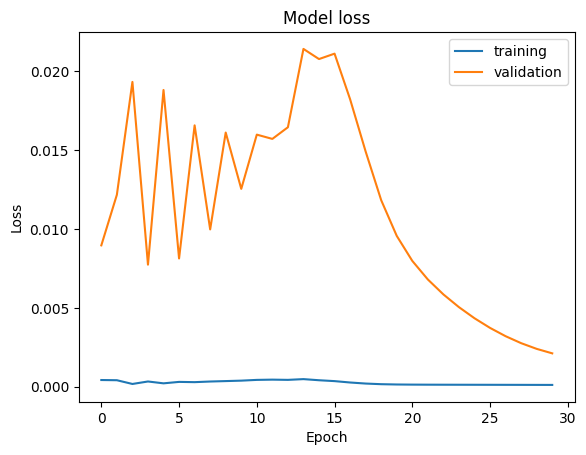

In [83]:
# Plot training
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

In [84]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Get something which has as many features as dataset
trainPredict_extended = np.zeros((len(trainPredict),num_of_features))
# Put the predictions there
trainPredict_extended[:,pred_col] = trainPredict[:,0]
# Inverse transform it and select the 3rd column.
trainPredict = scaler.inverse_transform(trainPredict_extended) [:,pred_col]

# Get something which has as many features as dataset
testPredict_extended = np.zeros((len(testPredict),num_of_features))
# Put the predictions there
testPredict_extended[:,pred_col] = testPredict[:,0]
# Inverse transform it and select the pred_col column.
testPredict = scaler.inverse_transform(testPredict_extended)[:,pred_col]

trainY_extended = np.zeros((len(trainY),num_of_features))
trainY_extended[:,pred_col]=trainY
trainY = scaler.inverse_transform(trainY_extended)[:,pred_col]

testY_extended = np.zeros((len(testY),num_of_features))
testY_extended[:,pred_col]=testY
testY = scaler.inverse_transform(testY_extended)[:,pred_col]

# calculate root mean squared error
trainScore_RMSE = math.sqrt(mean_squared_error(trainY, trainPredict))
testScore_RMSE = math.sqrt(mean_squared_error(testY, testPredict))

# calculate absolute mean error
trainScore_MAE = np.sum(np.absolute(trainY - trainPredict))/len(trainY)
testScore_MAE = np.sum(np.absolute(testY - testPredict))/len(testY)

8/8 [==============================] - 0s 17ms/step


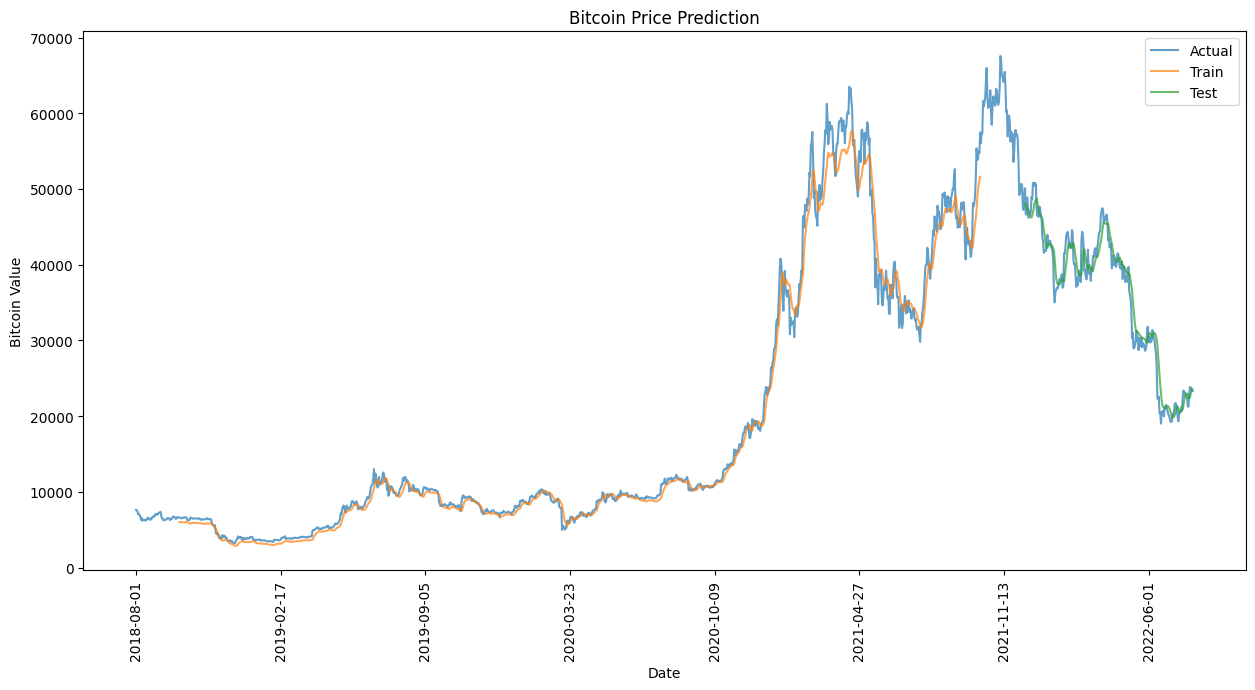

In [85]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, pred_col] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, pred_col] = testPredict

# contruct pandas dataframe for plotting
time_df = pd.DataFrame(org_df.index)
time_df['Actual'] = scaler.inverse_transform(dataset)[:,pred_col]
df1 = pd.DataFrame(trainPredictPlot[:,pred_col],columns=['Train'])
df2 = pd.DataFrame(testPredictPlot[:,pred_col],columns=['Test'])
time_df2 = pd.concat([time_df, df1, df2], axis=1, sort=False)
time_df2.set_index('Date',inplace=True)

# plot the output
fig, ax = plt.subplots(figsize=(15,7))
time_df2.plot(ax=ax,rot=90,alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Bitcoin Value')
plt.title('Bitcoin Price Prediction')
plt.savefig(expr_name + '.png',bbox_inches = "tight")

In [86]:
print('-' * 50)
print('Experiment name:', expr_name)

print('-' * 50)
print('look_back days:', look_back/24)
print('lstm_layers:', lstm_layers)
print('epochs:', epochs)
print('batch_size:', batch_size)
print('dataset features', list(org_df.columns))


print('-' * 50)
print('Train Score: %.2f RMSE' % (trainScore_RMSE))
print('Test Score: %.2f RMSE' % (testScore_RMSE))

print('-' * 50)
print('Train Score: %.2f MAE' % (trainScore_MAE))
print('Test Score: %.2f MAE' % (testScore_MAE))

print('-' * 50)
print('Model summary:')
model.summary()

--------------------------------------------------
Experiment name: expr_16
--------------------------------------------------
look_back days: 2.5
lstm_layers: 32
epochs: 30
batch_size: 32
dataset features ['High', 'Low', 'Close', 'Adj Close', 'Volume']
--------------------------------------------------
Train Score: 1689.13 RMSE
Test Score: 1956.40 RMSE
--------------------------------------------------
Train Score: 1018.29 MAE
Test Score: 1478.17 MAE
--------------------------------------------------
Model summary:
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 60, 32)            4864      
                                                                 
 gru_4 (GRU)                 (None, 32)                6336      
                                                                 
 dense_4 (Dense)             (None, 1)                 33   